In [15]:
from PIL import Image
import numpy as np
import tensorflow as tf
from keras import layers, models
from keras.datasets import mnist
import time
time.sleep(1)

# MNIST 데이터 로드
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 데이터 전처리
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# 모델 구성
model_num = models.Sequential()
model_num.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_num.add(layers.MaxPooling2D((2, 2)))
model_num.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_num.add(layers.MaxPooling2D((2, 2)))
model_num.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_num.add(layers.Flatten())
model_num.add(layers.Dense(64, activation='relu'))
model_num.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model_num.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model_num.fit(train_images, train_labels, epochs=25, batch_size=256, validation_split=0.2)

# 훈련된 모델 저장
model_num.save('mnist_cnn_model.h5')


Epoch 1/25
188/188 [==============================] - 32s 162ms/step - loss: 0.4219 - accuracy: 0.8758 - val_loss: 0.1152 - val_accuracy: 0.9662
Epoch 2/25
188/188 [==============================] - 26s 138ms/step - loss: 0.0948 - accuracy: 0.9707 - val_loss: 0.0730 - val_accuracy: 0.9773
Epoch 3/25
188/188 [==============================] - 29s 155ms/step - loss: 0.0646 - accuracy: 0.9804 - val_loss: 0.0669 - val_accuracy: 0.9806
Epoch 4/25
188/188 [==============================] - 29s 156ms/step - loss: 0.0492 - accuracy: 0.9841 - val_loss: 0.0540 - val_accuracy: 0.9835
Epoch 5/25
188/188 [==============================] - 28s 151ms/step - loss: 0.0401 - accuracy: 0.9877 - val_loss: 0.0423 - val_accuracy: 0.9877
Epoch 6/25
188/188 [==============================] - 28s 150ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 0.0462 - val_accuracy: 0.9866
Epoch 7/25
188/188 [==============================] - 28s 149ms/step - loss: 0.0285 - accuracy: 0.9912 - val_loss: 0.0461 - val_ac

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from keras import layers, models

# 각 연산별 데이터셋 폴더 경로
plus_dataset_path = "plus"
minus_dataset_path = "minus"
divide_dataset_path = "divide"
hat_dataset_path="hat"
multiply_dataset_path="multiply"
variableX_dataset_path = "variableX"

# 데이터셋 로드 및 전처리 함수
def load_and_preprocess_dataset(dataset_path):
    images = []
    labels = []

    for filename in os.listdir(dataset_path):
        if filename.endswith(".png"):
            img_path = os.path.join(dataset_path, filename)
            image = Image.open(img_path).convert("L")
            image = image.resize((28, 28))
            image_array = np.array(image).reshape((28, 28, 1)).astype("float32") / 255.0
            label = int(filename.split("_")[0])  # 파일명에서 문자 추룰

            images.append(image_array)
            labels.append(label)

    num_classes = np.max(labels) + 1
    return np.array(images), tf.keras.utils.to_categorical(labels, num_classes=num_classes), num_classes

# 각 연산에 대한 데이터셋 로드 및 전처리
plus_images, plus_labels, num_classes_plus = load_and_preprocess_dataset(plus_dataset_path)
minus_images, minus_labels, num_classes_minus = load_and_preprocess_dataset(minus_dataset_path)
divide_images, divide_labels, num_classes_divide = load_and_preprocess_dataset(divide_dataset_path)
hat_images,hat_labels,num_classes_hat=load_and_preprocess_dataset(hat_dataset_path)
multiply_images,multiply_labels,num_classes_multiply=load_and_preprocess_dataset(multiply_dataset_path)
variableX_images,variableX_labels,num_classes_variableX=load_and_preprocess_dataset(variableX_dataset_path)

# 각각의 모델 구성
def create_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation="relu"))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(num_classes, activation="softmax"))
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# 각각의 모델 생성
plus_model = create_model((28, 28, 1), num_classes_plus)
minus_model = create_model((28, 28, 1), num_classes_minus)
divide_model = create_model((28, 28, 1), num_classes_divide)
hat_model=create_model((28,28,1),num_classes_hat)
multiply_model=create_model((28,28,1),num_classes_multiply)
variableX_model=create_model((28,28,1),num_classes_variableX)

# 각 모델 훈련
plus_model.fit(plus_images, plus_labels, epochs=10, batch_size=256, validation_split=0.2)
minus_model.fit(minus_images, minus_labels, epochs=10, batch_size=256, validation_split=0.2)
divide_model.fit(divide_images, divide_labels, epochs=10, batch_size=256, validation_split=0.2)
hat_model.fit(hat_images, hat_labels, epochs=10, batch_size=256, validation_split=0.2)
multiply_model.fit(multiply_images, multiply_labels, epochs=10, batch_size=256, validation_split=0.2)
variableX_model.fit(variableX_images, variableX_labels, epochs=10, batch_size=256, validation_split=0.2)

# 각 모델의 출력 레이어를 제외한 부분을 가져와서 합칠 모델 생성
combined_model = models.Sequential()
combined_model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
combined_model.add(layers.MaxPooling2D((2, 2)))
combined_model.add(layers.Conv2D(64, (3, 3), activation="relu"))
combined_model.add(layers.MaxPooling2D((2, 2)))
combined_model.add(layers.Conv2D(64, (3, 3), activation="relu"))
combined_model.add(layers.Flatten())
combined_model.add(layers.Dense(64, activation="relu"))

# 추가한 부분: 각 모델의 출력 레이어를 제외한 부분을 추가
combined_model.add(plus_model.layers[-3])
combined_model.add(minus_model.layers[-3])
combined_model.add(divide_model.layers[-3])
combined_model.add(hat_model.layers[-3])
combined_model.add(multiply_model.layers[-3])
combined_model.add(variableX_model.layers[-3])


combined_model.add(layers.Dense(32,activation="relu"))
combined_model.add(layers.Dense(3, activation="softmax"))  # 최종 출력 레이어, 클래스 개수는 연산 종류의 수 (덧셈, 뺄셈, 나눗셈)

combined_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 훈련된 모델 저장
combined_model.save("combined_model.h5")

#variableX는 22~25가 앞에꺼랑 동일


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 2.3426 - accuracy: 0.0000e+00 - val_loss: 2.0669 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 47ms/step - loss: 2.0763 - accuracy: 1.0000 - val_loss: 1.7484 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 52ms/step - loss: 1.7675 - accuracy: 1.0000 - val_loss: 1.3422 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 50ms/step - loss: 1.3773 - accuracy: 1.0000 - val_loss: 0.8592 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 52ms/step - loss: 0.9134 - accuracy: 1.0000 - val_loss: 0.4046 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 49ms/step - loss: 0.4577 - accuracy: 1.0000 - val_loss: 0.1239 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 49ms/step - loss: 0.1535 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=========

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


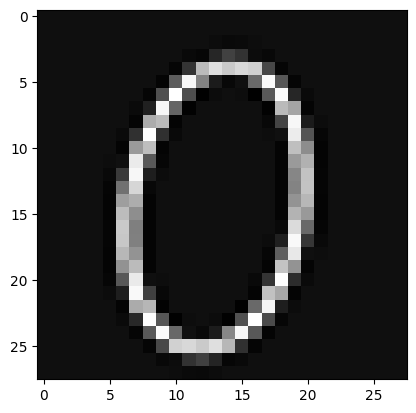

1/1 [==============================] - 0s 104ms/step
가장 높은 정확도를 가진 예측된 숫자: 0 
 O or X : O


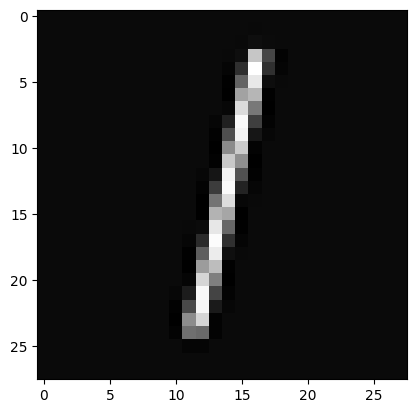

1/1 [==============================] - 0s 34ms/step
가장 높은 정확도를 가진 예측된 숫자: 1 
 O or X : O


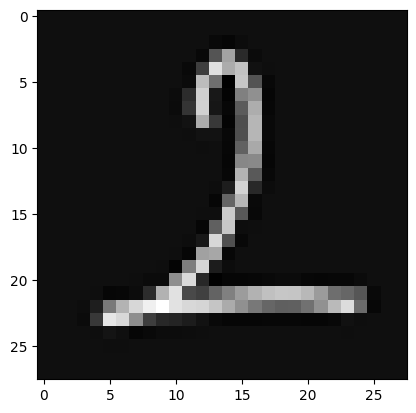

1/1 [==============================] - 0s 33ms/step
가장 높은 정확도를 가진 예측된 숫자: 1 
 O or X : X


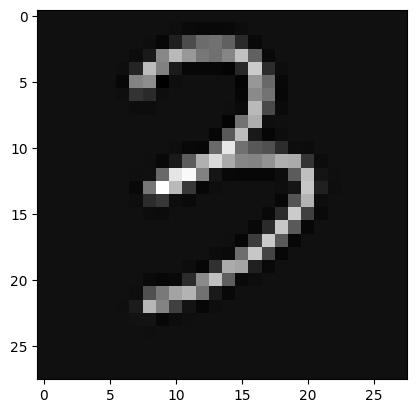

1/1 [==============================] - 0s 28ms/step
가장 높은 정확도를 가진 예측된 숫자: 3 
 O or X : O


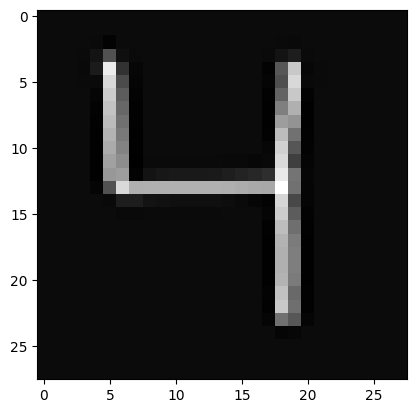

1/1 [==============================] - 0s 49ms/step
가장 높은 정확도를 가진 예측된 숫자: 4 
 O or X : O


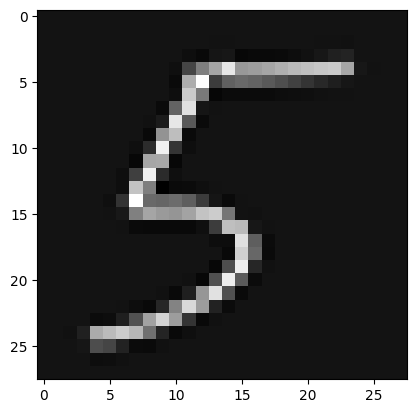

1/1 [==============================] - 0s 37ms/step
가장 높은 정확도를 가진 예측된 숫자: 5 
 O or X : O


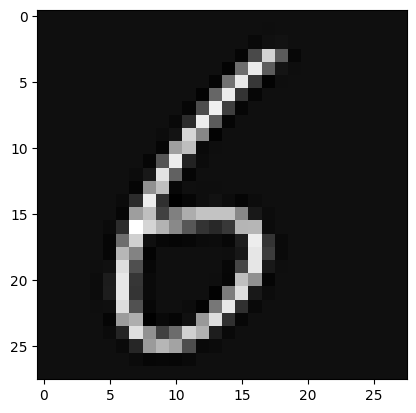

1/1 [==============================] - 0s 27ms/step
가장 높은 정확도를 가진 예측된 숫자: 6 
 O or X : O


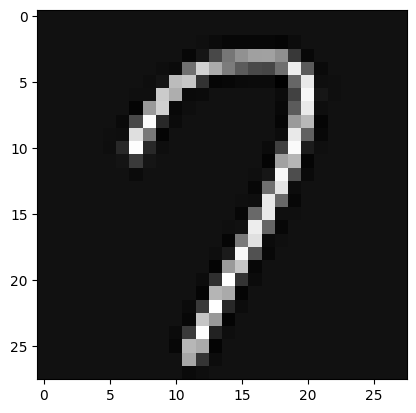

1/1 [==============================] - 0s 35ms/step
가장 높은 정확도를 가진 예측된 숫자: 7 
 O or X : O


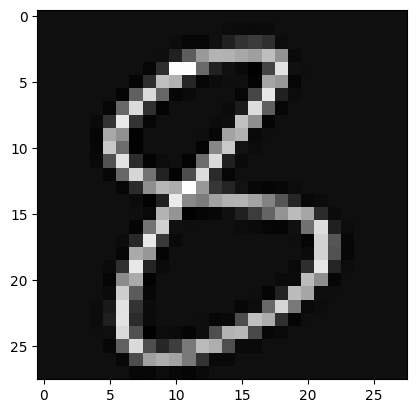

1/1 [==============================] - 0s 34ms/step
가장 높은 정확도를 가진 예측된 숫자: 8 
 O or X : O


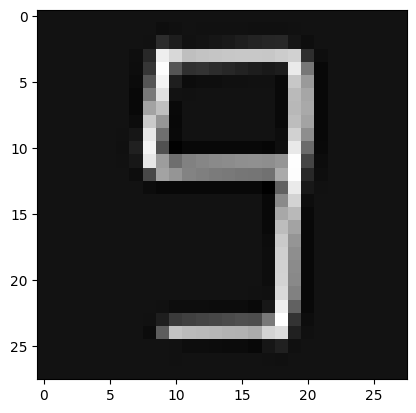

1/1 [==============================] - 0s 38ms/step
가장 높은 정확도를 가진 예측된 숫자: 4 
 O or X : X
accuracy =  80 %


In [20]:
import matplotlib.pyplot as plt

cnt = 0
for i in range(10):
    user_image_path = 'test_'+str(i)+'.png'  # 사용자가 직접 만든 이미지 파일 경로에 따라 수정
    user_image = Image.open(user_image_path).convert('L')  # 이미지를 흑백으로 변환

    # 이미지 크기 조정 및 배열로 변환
    user_image = user_image.resize((28, 28))
    user_image_array = np.array(user_image).astype('float32') / 255.0
    user_image_array = np.expand_dims(user_image_array, axis=0)
    user_image_array = np.expand_dims(user_image_array, axis=-1)

    # 사용자 이미지 시각화
    plt.imshow(user_image_array[0, :, :, 0], cmap='gray')
    plt.show()

    # 모델을 사용하여 예측
    predictions = model_num.predict(user_image_array)
    predicted_label = np.argmax(predictions)

    # 예측 결과 출력
    
    if (i==predicted_label):

        TF = 'O'
        cnt = cnt+1

    else:
        TF = 'X'


    print(f"가장 높은 정확도를 가진 예측된 숫자: {predicted_label}","\n O or X :",TF)
    
print("accuracy = ",cnt*10,"%")




In [50]:
from PIL import Image

def crop_image(input_image_path, output_folder, crop_size):
    """
    이미지를 여러 부분으로 자르는 함수

    Parameters:
    - input_image_path: 원본 이미지 파일 경로
    - output_folder: 자른 부분을 저장할 폴더 경로
    - crop_size: 자를 부분의 크기 (가로, 세로)

    Returns:
    - None
    """

    # 이미지 열기
    original_image = Image.open(input_image_path)

    # 이미지 크기
    width, height = original_image.size

    # 자를 부분 크기
    crop_width, crop_height = crop_size

    # 이미지를 여러 부분으로 자르기
    for left in range(0, width, crop_width):
        for top in range(0, height, crop_height):
            right = left + crop_width
            bottom = top + crop_height

            # 부분 이미지 추출
            cropped_image = original_image.crop((left, top, right, bottom))

            # 자른 부분 저장
            output_path = f"{output_folder}/crop_{left}_{top}.png"
            cropped_image.save(output_path)


input_image_path = "test_line.png"  # 원본 이미지 파일 경로
output_folder = "slices_of_test_line"  # 자른 부분을 저장할 폴더 경로
crop_size = (288, 533)  # 자를 부분의 크기 (가로, 세로)

# 폴더가 존재하지 않으면 생성
import os
os.makedirs(output_folder, exist_ok=True)

# 이미지 자르기 함수 호출
crop_image(input_image_path, output_folder, crop_size)


In [22]:
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.metrics import mean_squared_error

# 학습된 모델 불러오기
model = tf.keras.models.load_model('combined_model.h5')  # 모델 파일 경로에 따라 수정

def calculate_mse(image1, image2):
    # 이미지를 NumPy 배열로 변환
    array1 = np.array(image1).astype('float32') / 255.0
    array2 = np.array(image2).astype('float32') / 255.0

    # 이미지 간의 평균 제곱 오차(MSE) 계산
    mse = mean_squared_error(array1.flatten(), array2.flatten())

    return mse

def predict_user_image(user_image_path, reference_image_path, threshold=0.05):
    # 사용자가 직접 만든 손글씨 이미지 로드
    user_image = Image.open(user_image_path).convert('L')  # 이미지를 흑백으로 변환
    user_image = user_image.resize((28, 28))

    # 모델을 사용하여 예측
    predictions = model.predict(np.expand_dims(np.expand_dims(user_image, axis=0), axis=-1))
    predicted_label = np.argmax(predictions)

    # 학습된 + 이미지 불러오기
    reference_image = Image.open(reference_image_path).convert('L')  # 학습된 + 이미지 파일 경로에 따라 수정
    reference_image = reference_image.resize((28, 28))

    # 이미지 간의 평균 제곱 오차(MSE) 계산
    mse = calculate_mse(user_image, reference_image)

    # 유사도가 threshold 이상이면 동일하다고 판단
    is_same = mse < threshold

    return predicted_label, is_same


user_image1_path = 'test_plus.png'  # 사용자가 직접 만든 이미지 파일 경로에 따라 수정
user_image2_path = 'test_minus.png' 
user_image3_path = 'test_divide.png'
user_image4_path = 'test_hat.png' 
user_image5_path = 'test_multiply.png' 
user_image6_path = 'test_variable_x.png' 

reference_image1_path= './plus/10_ (4).png'
reference_image2_path= './minus/11_ (4).png'
reference_image3_path= './divide/12_ (4).png'
reference_image4_path= './hat/13_ (4).png'
reference_image5_path= './multiply/14_ (4).png'
reference_image6_path= './variableX/15_ (4).png'

# 예측 결과 및 유사도 출력
predicted_label, is_same = predict_user_image(user_image1_path,reference_image1_path)
print(f"예측된 숫자: {predicted_label}")
print(f"동일 여부: {is_same}")

predicted_label, is_same = predict_user_image(user_image2_path,reference_image2_path)
print(f"예측된 숫자: {predicted_label}")
print(f"동일 여부: {is_same}")

predicted_label, is_same = predict_user_image(user_image3_path,reference_image3_path)
print(f"예측된 숫자: {predicted_label}")
print(f"동일 여부: {is_same}")

predicted_label, is_same = predict_user_image(user_image4_path,reference_image4_path)
print(f"예측된 숫자: {predicted_label}")
print(f"동일 여부: {is_same}")

predicted_label, is_same = predict_user_image(user_image5_path,reference_image5_path)
print(f"예측된 숫자: {predicted_label}")
print(f"동일 여부: {is_same}")

predicted_label, is_same = predict_user_image(user_image6_path,reference_image6_path)
print(f"예측된 숫자: {predicted_label}")
print(f"동일 여부: {is_same}")

1/1 [==============================] - 0s 115ms/step
예측된 숫자: 1
동일 여부: True
1/1 [==============================] - 0s 28ms/step
예측된 숫자: 1
동일 여부: True
1/1 [==============================] - 0s 27ms/step
예측된 숫자: 1
동일 여부: False
1/1 [==============================] - 0s 33ms/step
예측된 숫자: 1
동일 여부: False
1/1 [==============================] - 0s 30ms/step
예측된 숫자: 1
동일 여부: False
1/1 [==============================] - 0s 23ms/step
예측된 숫자: 1
동일 여부: False
